In [57]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
np.random.seed(0)

In [59]:
%store -r data
%store -r train
%store -r test
%store -r y
%store -r features

# we can use the SciKit Learn's train_test_split function from model_selection with a fixed randomState

### Neural Network Classifier

In [80]:
#one hidden layer
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
#2 hidden layers same nodes : accuracy score: 0.83
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1) 
#2 hidden layers different number of nodes: accuracy score: 0.68
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1)

# use cross-validation for number of layers and nodes for each

In [81]:
clf.fit(train[features], y) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Accuracy Metrics on Test Data

In [82]:
clf.predict(test[features])

array([1, 1, 1, ..., 6, 6, 6])

In [83]:
# predicted probabilities of the first 10 rows
clf.predict_proba(test[features])[0:10]

array([[ 0.87010215,  0.07256453,  0.03332139,  0.00966238,  0.00407828,
         0.01027127],
       [ 0.87067779,  0.07175649,  0.03396256,  0.00982835,  0.00389569,
         0.00987911],
       [ 0.8706781 ,  0.07127577,  0.03324537,  0.00927508,  0.00449198,
         0.0110337 ],
       [ 0.867566  ,  0.07418925,  0.03394091,  0.00984936,  0.00399208,
         0.01046239],
       [ 0.8704002 ,  0.07194362,  0.03321067,  0.00932543,  0.00433964,
         0.01078044],
       [ 0.8683382 ,  0.07375562,  0.03434873,  0.01004988,  0.00369885,
         0.00980872],
       [ 0.86869977,  0.07250857,  0.03366171,  0.00946075,  0.00444067,
         0.01122853],
       [ 0.86761249,  0.07407351,  0.03392028,  0.00965912,  0.00407276,
         0.01066184],
       [ 0.86980953,  0.07265227,  0.03366688,  0.00971053,  0.00398986,
         0.01017093],
       [ 0.86907902,  0.07249359,  0.03414556,  0.0097811 ,  0.00406101,
         0.01043972]])

In [84]:
predictionsNN = clf.predict(test[features])
predictionsNN

array([1, 1, 1, ..., 6, 6, 6])

In [85]:
pd.crosstab(test['Activity'], predictionsNN, rownames=['Actual Activity'], colnames=['Predicted Activity'])

Predicted Activity,1,2,3,4,5,6
Actual Activity,,,,,,
1,32050,24,1361,42,2266,7
2,1328,24985,2985,5009,563,1403
3,2084,944,29472,2446,132,1169
4,1814,1806,2886,28496,676,403
5,858,97,21,348,33428,901
6,237,1137,791,605,964,32469


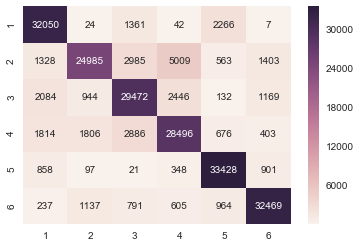

In [86]:
sns.heatmap(data=confusion_matrix(test['Activity'],predictionsNN),
            fmt='.0f',
            annot=True,
            xticklabels=np.unique(test['Activity']),
            yticklabels=np.unique(test['Activity']))

In [88]:
print(classification_report(test['Activity'],predictionsNN))

             precision    recall  f1-score   support

          1       0.84      0.90      0.86     35750
          2       0.86      0.69      0.77     36273
          3       0.79      0.81      0.80     36247
          4       0.77      0.79      0.78     36081
          5       0.88      0.94      0.91     35653
          6       0.89      0.90      0.90     36203

avg / total       0.84      0.84      0.84    216207



In [89]:
accuracy_score(test['Activity'],predictionsNN)

0.83669816425925159